In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("/content/train.xlsx")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df=df.drop('customerID',axis=1)

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Get the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [12]:
# replace column values with 0 and 1
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [13]:
# create a dictionary to store the mapping of labels to numerical values
label_map = {}

# iterate over the categorical columns
for col in categorical_cols:
    # get the unique values of the column
    unique_vals = df[col].unique()
    
    # create a dictionary to store the mapping of each unique value to a numerical value
    col_map = {}
    
    # assign a numerical value to each unique value
    for i, val in enumerate(unique_vals):
        col_map[val] = i
        
    # store the column mapping in the label_map dictionary
    label_map[col] = col_map
    
    # replace the categorical values in the column with the numerical values
    df[col] = df[col].map(col_map)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4,1


In [15]:
print(label_map)

{'gender': {'Female': 0, 'Male': 1}, 'Partner': {'Yes': 0, 'No': 1}, 'Dependents': {'No': 0, 'Yes': 1}, 'PhoneService': {'No': 0, 'Yes': 1}, 'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2}, 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2}, 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 2}, 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2}, 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}, 'PaperlessBilling': {'Yes': 0, 'No': 1}, 'PaymentMethod': {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}, 'TotalCharges': {29.85: 0, 1889.5: 1, 108.15: 2, 1840.75: 3, 151.65: 4, 820.5: 5, 1949.4: 6, 301.9: 7, 3046.05: 8, 3487.95: 9,

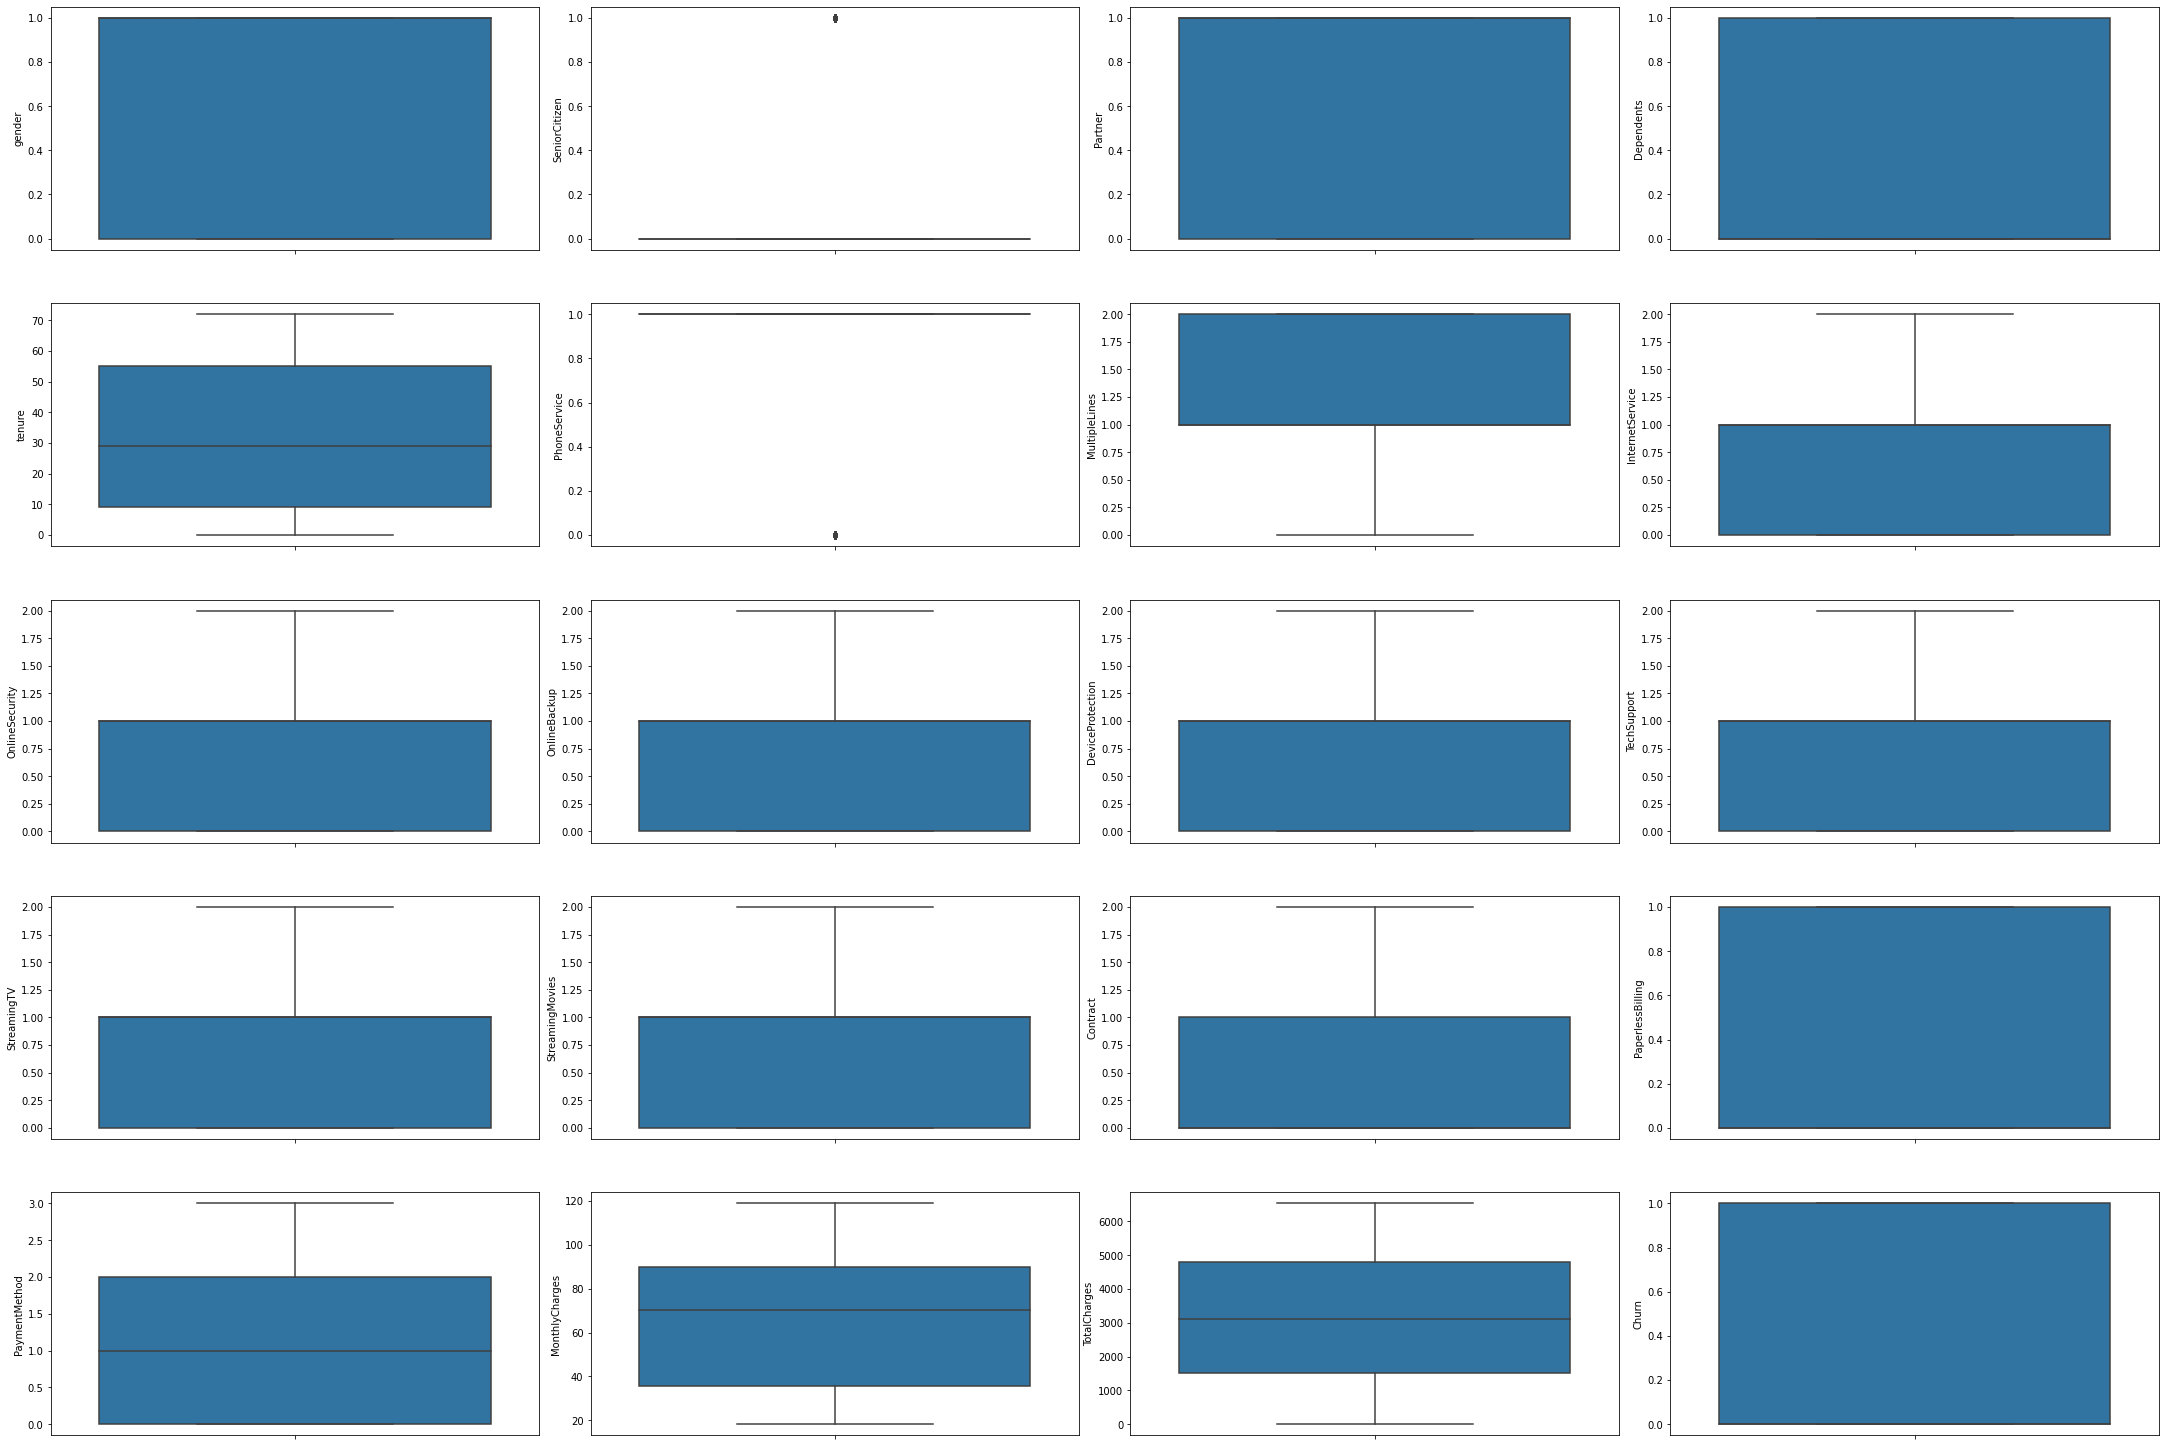

In [16]:
#checking outiliers in dataset
fig, axs = plt.subplots(ncols=4 ,nrows=5, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data= df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

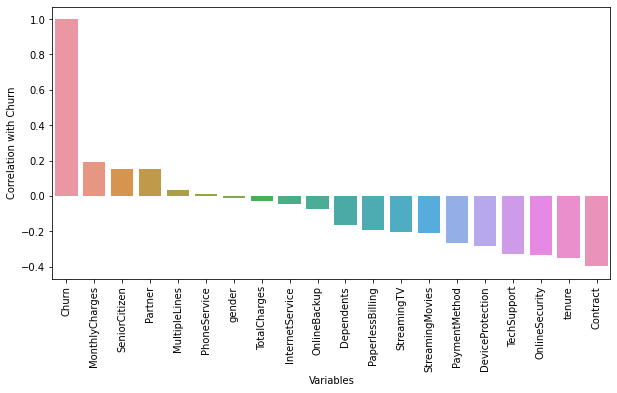

In [17]:
# get correlation of "Churn" with other variables
corr_matrix = df.corr()["Churn"].sort_values(ascending=False)

# plot bar chart of correlations
plt.figure(figsize=(10,5))
sns.barplot(x=corr_matrix.index, y=corr_matrix.values)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Correlation with Churn")
plt.show()

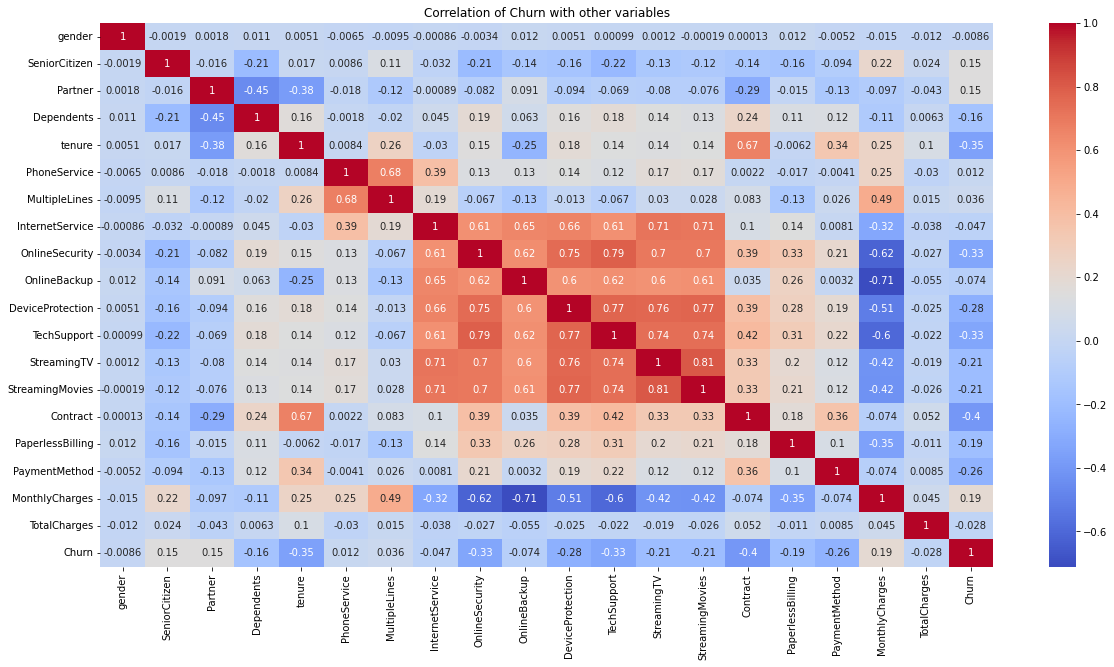

In [18]:
# create a correlation matrix
corr_matrix = df.corr()

# plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Churn with other variables')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

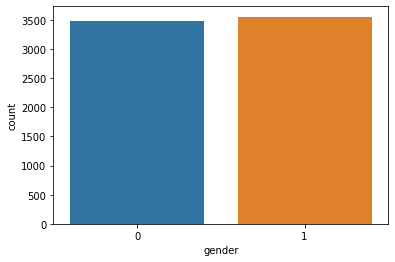

In [19]:
sns.countplot(x='gender', data=df)

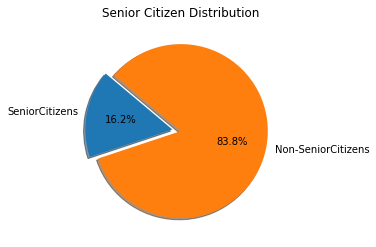

In [20]:
# Get the count of senior citizens
senior_count = df[df['SeniorCitizen'] == 1]['SeniorCitizen'].count()

# Get the count of non-senior citizens
non_senior_count = df[df['SeniorCitizen'] == 0]['SeniorCitizen'].count()

# Create a list of values
values = [senior_count, non_senior_count]

# Create a list of labels
labels = ['SeniorCitizens', 'Non-SeniorCitizens']

# Set the explode parameter to highlight the Senior Citizens slice
explode = (0.1, 0)

# Create a pie chart
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title to the chart
plt.title('Senior Citizen Distribution')

# Show the chart
plt.show()

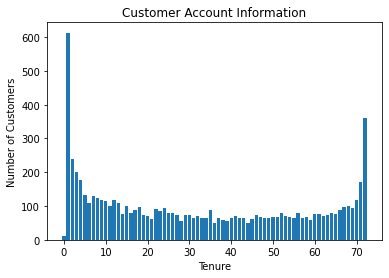

In [21]:
# count the number of customers by account type
account_counts = df['tenure'].value_counts()

# create a bar chart of account type counts
plt.bar(account_counts.index, account_counts.values)

# set the title and labels for the chart
plt.title('Customer Account Information')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

# display the chart
plt.show()

Text(0.5, 1.0, 'of Customers by Contract Type')

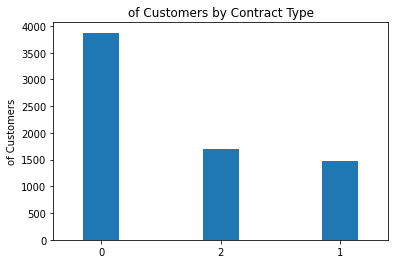

In [22]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('of Customers')
ax.set_title('of Customers by Contract Type')

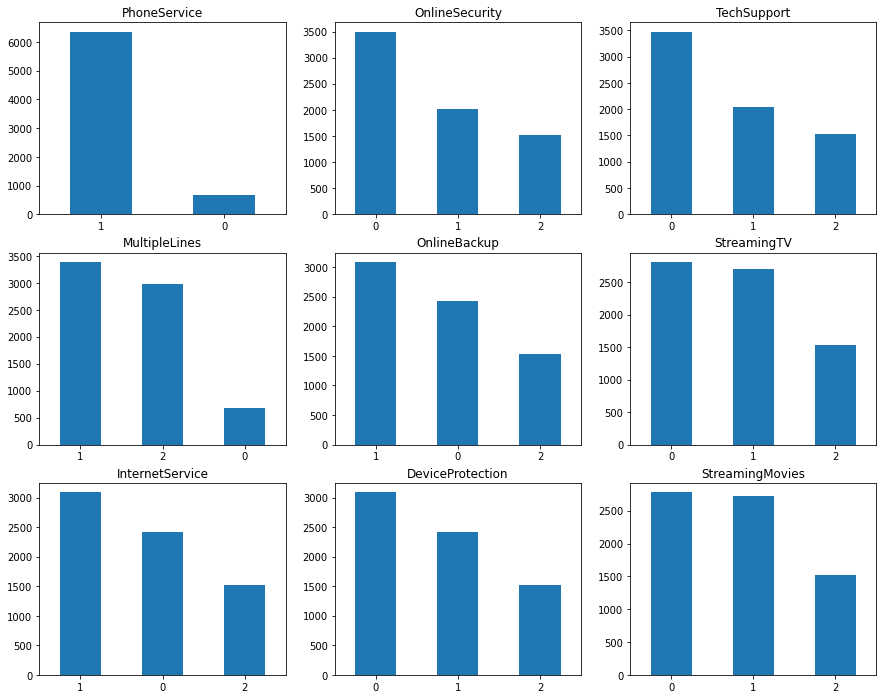

In [23]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

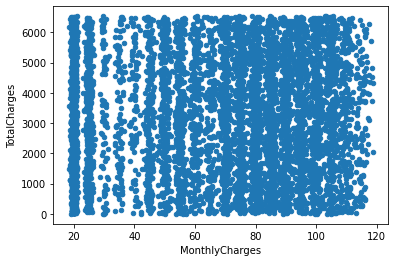

In [24]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Text(0.5, 1.0, 'Churn Rate')

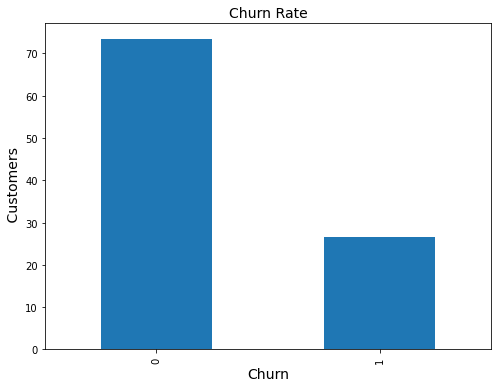

In [25]:
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',figsize = (8,6))
ax.set_ylabel(' Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

<Axes: xlabel='Churn', ylabel='tenure'>

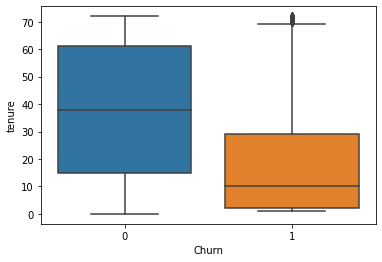

In [26]:
sns.boxplot(x = df.Churn, y = df.tenure)

Text(0.5, 1.0, 'Churn by Contract Type')

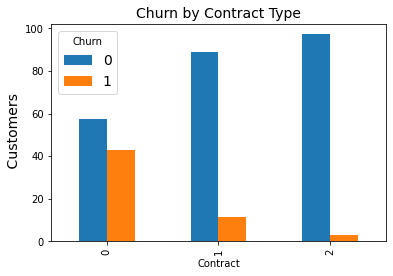

In [27]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar')
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel(' Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

Text(0.5, 1.0, 'Churn by Seniority Level')

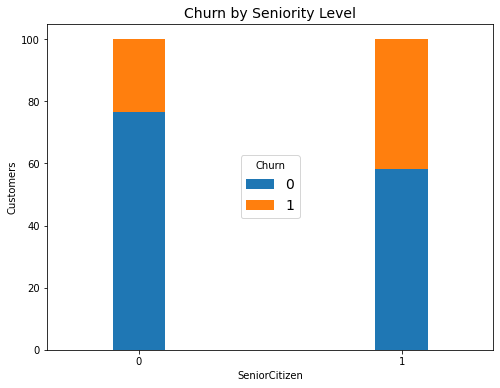

In [28]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('Customers')
ax.set_title('Churn by Seniority Level',size = 14)

In [29]:
y = df['Churn'].values
X = df.drop(columns = ['Churn'])

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to target variable only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to pandas dataframe
y_resampled = pd.DataFrame(y_resampled, columns=['Churn'])

Text(0.5, 1.0, 'Churn Rate')

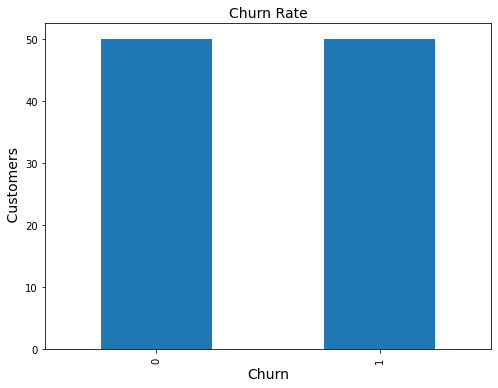

In [31]:
ax = (y_resampled['Churn'].value_counts()*100.0 /len(y_resampled)).plot(kind='bar',figsize = (8,6))
ax.set_ylabel(' Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

In [32]:
# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
#predicting the model
y_pred = model.predict(X_test)

In [35]:
print(y_pred)

[1 0 1 ... 1 1 0]


In [36]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8280193236714976


In [39]:
from sklearn.ensemble import RandomForestClassifier
# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', max_leaf_nodes=30,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=50)

In [40]:
from sklearn import metrics

In [41]:
# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8309178743961353


In [42]:
# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8342995169082126

In [44]:
# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Test decision tree model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7840579710144927


In [63]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(colsample_bytree= 0.9071168163710651, 
                      gamma= 0.6400419533775026, 
                      max_depth= round(6.112471405351496), 
                      min_child_weight= 4.025267705883393, 
                      subsample= 1.0)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8439613526570048

In [64]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the objective function for hyperparameter tuning
def xgb_cv(max_depth, gamma, min_child_weight, subsample, colsample_bytree):
    # Define the XGBoost classifier with the specified hyperparameters
    xgb_model = xgb.XGBClassifier(
        max_depth=int(max_depth),
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42
    )
    # Evaluate the classifier using cross-validation
    scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
    # Return the mean AUC score across cross-validation folds
    return scores.mean()

# Define the bounds for the hyperparameters to search over
pbounds = {
    'max_depth': (3, 7),
    'gamma': (0, 1),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1)
}

# Initialize the Bayesian Optimization object with the objective function and bounds
xgb_bo = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=42
)

# Run the optimization for the specified number of iterations
xgb_bo.maximize(init_points=10, n_iter=20, acq='ei')

# Print the best hyperparameters and corresponding AUC score
print(xgb_bo.max)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.9181    | 0.6873    | 0.9507    | 5.928     | 6.388     | 0.578     |
| 2         | 0.9187    | 0.578     | 0.05808   | 6.465     | 6.41      | 0.854     |
| 3         | 0.915     | 0.5103    | 0.9699    | 6.33      | 2.911     | 0.5909    |
| 4         | 0.9171    | 0.5917    | 0.3042    | 5.099     | 4.888     | 0.6456    |
| 5         | 0.9184    | 0.8059    | 0.1395    | 4.169     | 4.297     | 0.728     |
| 6         | 0.9158    | 0.8926    | 0.1997    | 5.057     | 6.332     | 0.5232    |
| 7         | 0.9198    | 0.8038    | 0.1705    | 3.26      | 9.54      | 0.9828    |
| 8         | 0.9183    | 0.9042    | 0.3046    | 3.391     | 7.158     | 0.7201    |
| 9         | 0.9163    | 0.561     | 0.4952    | 3.138     | 9.184     | 0.6294    |
| 10        | 0.9151    | 0.8313    | 0.3117    | 5.08

In [47]:
pip install bayesian-optimization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import pickle

In [66]:
# Save the model as a .pkl file
filename = 'xgb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

In [67]:
test=pd.read_excel("/content/test1.xlsx")

In [68]:
prediction=xgb_model.predict(test)

In [69]:
prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1])